<a/ id='top'></a>

### Homework 1: Exploratory Data Analysis and Data Cleaning
***

**Name**:

***

This assignment is due on Moodle by **12 PM noon on Friday 8 June**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a URL is given for a data set, you will find the required data on Piazza in the Resources tab, under the Data section.
- If you are not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  There is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. It is always advisable to do what you can to make the person grading your work happy :)

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt
%matplotlib inline

<br>

<a/ id='p1'></a>
[Back to top](#top)
*** 
### [10 pts] Problem 1

Dan has just finished baking a bunch of cookies for his wonderful friends. But, because he is also a good friend, he wants to test the cookies to estimate how delicious they are.  After all, if he baked gross cookies, he probably shouldn't give them to his friends, right?

In Dan's batch, there are 50 chocolate chip, 20 oatmeal raisin, 20 macadamia nut and 10 snickerdoodle cookies.  To estimate the deliciousness of the batch, Dan randomly selects 10 cookies and tastes them.  Dan is quite methodical, so he has a log of all of the cookies he has baked, and he intentionally selects 5 chocolate chip, 2 oatmeal raisin, 2 macadamia nut and 1 snickerdoodle cookie from his log to test.

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

Population: all the cookies in Dan's batch (100 total)
Sample Frame: Dan's Cookie Log
Sample: the set of 10 cookies he picked from the population
Type of Sample: stratified sample
Quantity of interest: Deliciousness 

<br>

<a/ id='p2'></a>
[Back to top](#top)
*** 
### [20 pts] Problem 2 

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ goes to inﬁnity. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.2 \quad
4.2 \quad
3.0 \quad
6.6
$$

**Part A**: Compute the sample mean and sample median.


In [3]:
nums = np.array([4.6,5.0,6.5,7.2,4.2,3.0,6.6])
samMean = np.mean(nums)
samMedian = np.median(nums)
sort = np.sort(nums)
#for x in sort: print(x)
print("Mean: ", samMean)
print("Median: ", samMedian)

Mean:  5.3
Median:  5.0


**Part B**: We replace the element $5.0$ by some real number $z$. What happens with the sample mean and the sample median of this new dataset as $z \rightarrow \infty$?

Mean:

The mean will also go to infinity.

Median:

The median will change depending on z.

For z < 4.6, median = 4.6
4.6 <= z <= 6.5, median = z
6.5 < z, median = z

So as z approaches infinity, the median will remain at 6.5.

**Part C**: We replace a number of elements by some real number $z$. How many elements do we need to replace so that the sample median of the new dataset goes to infinity as $z \rightarrow \infty$?

4,
This way none of the three original values remaining could be the median, only one of the z's

**Part D**: Suppose we have another data set of size $n$. How many elements do we need to replace by some real number $z$, so that the sample mean of the new dataset diverges as $z \rightarrow \infty$? And how many elements do we need to replace, so that the sample median of the new dataset goes to infinity? 

Mean:

any single element

Median:

if n is even, need to replace $\frac{n}{2}$ elements

if n is odd, need to replace $\frac{n+1}{2}$ elements


<br>

<a/ id='p3'></a>
[Back to top](#top)
*** 
### [35 pts] Problem 3 

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Solution:
$$
\bar{x}_{n-1}  (n-1) = \sum_{k=1}^{n-1} x_k  \quad \textrm{and} \quad \bar{x}_n = \frac{(\sum_{k=1}^{n-1} x_k)+ x_n}{n}
$$
$$
\bar{x}_n = \frac{\bar{x}_{n-1}  (n-1) + x_n}{n}
$$

Which simplifies to:

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may **not** use any built-in sample mean or variance functions.

In [4]:
def my_sample_mean(arr):
    mean = sum(arr)/len(arr)
    return mean

def my_sample_var(arr):
    currMean = my_sample_mean(arr)
    squareDifs = (arr - currMean)**2
    return (1/(len(arr)-1))*squareDifs.sum()    

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array of bicycle ride lengths.

`ride_lengths = [25, 23, 12, 38, 6, 6, 28, 45, 64, 17, 20, 100]`

In [5]:
arr = np.array([25, 23, 12, 38, 6, 6, 28, 45, 64, 17, 20, 100])
#print(arr.mean())
print("Mean: ", my_sample_mean(arr))
#print(arr.var())
print("Variance: ", my_sample_var(arr))

Mean:  32.0
Variance:  738.1818181818182


**Part D**: Implement a third function called `update_mean` that implements the formula whose validity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first one ride, the first two rides, the first three rides, and so on up to all the bike rides. Store your ride length means in a numpy array called `rolling_means`.  Report all 12 estimates in `rolling_means`.

In [6]:
def update_mean(xn, xnmin1Mean, n):
    return xnmin1Mean + (xn - xnmin1Mean)/(n)
def calc_store_means(arr):
    rolling_means = np.empty(len(arr))
    currMean = 0
    for i,x in enumerate(arr):
        rolling_means[i] = update_mean(x, currMean, i+1)
        currMean = rolling_means[i]
    return (rolling_means)
rolling_means = calc_store_means(arr)
print("Rolling Means: ", rolling_means)


Rolling Means:  [25.         24.         20.         24.5        20.8        18.33333333
 19.71428571 22.875      27.44444444 26.4        25.81818182 32.        ]


**Part E:** There is a similar relation for an online update of the variance. This relation between the variance of the first $n-1$ observations and the variance of all $n$ observations is:

$$
s^2_n = \frac{(n-2)}{(n-1)}s^2_{n-1} + \frac{(x_n - \bar{x}_{n-1})^2}{n}
$$

Implement a function called `update_var` that implements this update for the variance.  Note that the function will require four things as input: $\bar{x}_{n-1}$, $s^2_{n-1}$, $x_n$ and $n$. You may start the recurrence with $s^2_1 = 0$.

Then, use this function to compute the values that you get for the variance of the first two rides, the first three rides, and so on up to all of the bike rides. Store your ride length variances in a numpy array called `rolling_vars`. Report all variance estimates from `rolling_vars`, and be sure your final estimate using all of the data agrees with your answer from **Part C**.

In [7]:
def update_var(xnmin1Mean, s2nmin1, x, n):
    return (((n-2)/(n-1))*s2nmin1+((x-xnmin1Mean)**2)/n)
def calc_store_vars(arr):
    rolling_vars = np.empty(len(arr))
    for i,x in enumerate(arr):
        if i == 0:
            rolling_vars[i] = 0
        else:
            rolling_vars[i] = update_var(rolling_means[i-1], rolling_vars[i-1], x, i+1)
    return rolling_vars
rolling_vars = calc_store_vars(arr)
print("Rolling Variances: ", rolling_vars)

Rolling Variances:  [  0.           2.          49.         113.66666667 153.7
 159.46666667 146.23809524 205.26785714 367.52777778 337.6
 307.56363636 738.18181818]


<br>

<a/ id='p4'></a>
[Back to top](#top)
*** 
### [35 pts] Problem 4

Some claim that the final hours aboard the RMS Titanic were marked by class warfare; others claim it was characterized by male chivalry.  We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios.

Access the dirty Titanic data in [`titanic_data.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jhz5hca2axb6zw) (linked here) and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.

Please make sure you do **NOT** accidentally use the `clean_titanic_data.csv` data set from the first in-class notebook.

In [8]:
# Two different paths to the data
# Modify the `local path` to wherever it lives on your machine
local_path = '../data/titanic_data.csv'
web_path = 'https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jhz5hca2axb6zw'

# Select the path that works for you 
file_path = web_path 

# Load the data into a DataFrame 
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

Class warfare: there would be a correlation between class and survival rate 

Male Chivalry: there would be a positive correlation between being female and survival

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

Also, answer these questions and display any relevant codes:
1. How many rows were in the original DataFrame?
2. How many rows are in the cleaned DataFrame?

In [9]:
condition1 = df["Age"] >= 0
condition2 = df["Survived"] >= 0
condition3 = df["Pclass"] >= 1
condition4 = df["Sex"] != ""
dfTitanic = df.loc[condition1&condition2&condition3&condition4].copy()

print("Original: ", len(df))
print("Clean: ", len(dfTitanic))


Original:  891
Clean:  714


**Part C**: Determine the fraction of survivors from each passenger class. Round your answers to **3 decimal places**.

In [10]:
dfWinners = dfTitanic.loc[dfTitanic["Survived"]==1]
tot = len(dfWinners)
print("Class: ", "Fraction of Survivors")
print("Class 1: ", "%.3f" % (len(dfWinners[dfWinners["Pclass"]==1])/tot))
print("Class 2: ", "%.3f" % (len(dfWinners[dfWinners["Pclass"]==2])/tot))
print("Class 3: ", "%.3f" % (len(dfWinners[dfWinners["Pclass"]==3])/tot))

Class:  Fraction of Survivors
Class 1:  0.381
Class 2:  0.237
Class 3:  0.381


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

Note that there are 6 class-gender combinations to report survival fractions for.

In [11]:
winnersClasses = [dfWinners["Pclass"]==1, dfWinners["Pclass"]==2, dfWinners["Pclass"]==3]
allClasses = [dfTitanic["Pclass"]==1, dfTitanic["Pclass"]==2, dfTitanic["Pclass"]==3]
winnersGender = [dfWinners["Sex"]=="male",dfWinners["Sex"]=="female"]
allGender = [dfTitanic["Sex"]=="male",dfTitanic["Sex"]=="female"]
survivalGroups = ["Male, Class 1: ", "Male, Class 2: ", "Male, Class 3: ", "Female, Class 1: ", "Female, Class 2: ", "Female, Class 3: "]
survivalRates = []
for i in range(len(allGender)):
    for j in range(len(allClasses)):
        survivalRates.append(len((dfWinners.loc[winnersClasses[j]&winnersGender[i]]))/len((dfTitanic.loc[allClasses[j]&allGender[i]])))
print("Gender, Class: ", "Fraction Survived")
for i in range(len(survivalRates)):
    print(survivalGroups[i], "%.3f" % survivalRates[i])
print("Women in third class survived at a greater rate than men in first class")

Gender, Class:  Fraction Survived
Male, Class 1:  0.376
Male, Class 2:  0.172
Male, Class 3:  0.155
Female, Class 1:  0.947
Female, Class 2:  0.879
Female, Class 3:  0.525
Women in third class survived at a greater rate than men in first class


**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

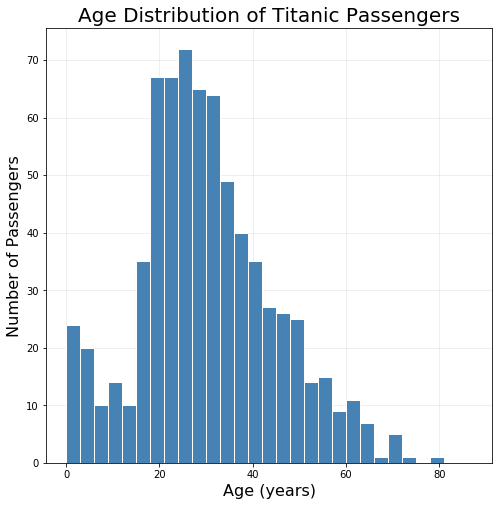

In [14]:
my_bins = range(0,90,3)
fig, axes = plt.subplots(figsize=(8,8))

plot = dfTitanic.hist(column="Age", ax=axes, bins = my_bins, facecolor="steelblue", edgecolor="white")

axes.set_title("Age Distribution of Titanic Passengers", fontsize=20)
axes.set_xlabel("Age (years)", fontsize=16)
axes.set_ylabel("Number of Passengers", fontsize=16)

axes.grid(alpha=0.25)
axes.set_axisbelow(True)


Based on the histogram above, the age distribution is positively skewed.

There is a clear mode around ages 24-27, however there is a smaller, barely distinct peak around ages 0-3, so the data is weakly bimodal.

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [12]:
dfRIPladies = dfTitanic.loc[(dfTitanic["Survived"]==0)&(dfTitanic["Sex"]=="female")]
dfAliveLadies = dfWinners.loc[dfWinners["Sex"]=="female"]
print("Survived", "Mean", "Median")
aliveMean = dfAliveLadies["Age"].mean()
deadMean = dfRIPladies["Age"].mean()
aliveMedian = dfAliveLadies["Age"].median()
deadMedian = dfRIPladies["Age"].median()
print("Yes!\t", "%.1f" % aliveMean, "\t", aliveMedian)
print("No :(\t", "%.1f" % deadMean, "\t", deadMedian)


Survived Mean Median
Yes!	 28.4 	 26.0
No :(	 29.0 	 29.0


The mean and median ages of the surviving women was lower than the mean and median ages of the women who did not survive.

**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

Gender, Class:  Fraction Survived
Male, Class 1:  0.287
Male, Class 2:  0.139
Male, Class 3:  0.127
Female, Class 1:  0.755
Female, Class 2:  0.671
Female, Class 3:  0.431

The above data suggests both class warfare and male chivalry both influenced the survival rates of different groups on the titanic. 

Male Chivalry: Even the lowest class women survived at a greater rate than the highest class men. For each class, women survived at a greater rate than the men of the same class. 

Class Warfare: There is a clear trend of increasing survival rates with increasing class (decreasing class number). 

---
[Back to top](#top)